### Introduction to Machine Learning, UZH FS18, Group Project

### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch


#     
# III.     Feature Exraction with PCA

In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import sklearn as skl
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import neural_network
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import neighbors
from functools import reduce
from functools import reduce
from pandas.core import datetools

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

# Import datasets


In [2]:
# Import imputed dataset
imputed_dataset = pd.read_csv('Data/generated/imputed_dataset_ml.csv', sep = ',')
# Import dataset wit dropped Nans
dropnan_dataset = pd.read_csv('Data/generated/dropnan_dataset_ml.csv', sep = ',')

print('Shape of Imputed Dataset = ' + str(imputed_dataset.shape))
print('Shape of Dataset with Nans dropped = ' + str(dropnan_dataset.shape))



Shape of Imputed Dataset = (3519, 94)
Shape of Dataset with Nans dropped = (1430, 94)


# Prepare Data for Version 1: Imputed Dataset

### Feature Matrix and Response Vector 

In [3]:
# Extract labels of features
labels_of_features_1 = imputed_dataset.columns[:-1]
type(labels_of_features_1)

# X1 is the feature matrix
X1 = imputed_dataset.iloc[:, :-1]

display(X1.head())

,Unnamed: 0,PERMNO,DATE,NAICS,BIDLO,ASKHI,PRC,VOL,BID,ASK,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
0,1,10107.0,1.138752e+18,511210.0,26.39,28.0400,26.87,11088149.0,26.87,26.88,...,1.323,0.151,0.025,0.0,0.036,6.281,10.280,0.0134,14.555,1.838
1,2,10107.0,1.141171e+18,511210.0,26.85,27.8900,27.21,14514337.0,27.24,27.24,...,1.323,0.151,0.025,0.0,0.036,6.293,10.410,0.0132,14.739,1.842
2,3,10107.0,1.143850e+18,511210.0,24.15,27.7400,24.15,14689919.0,24.16,24.16,...,1.323,0.151,0.025,0.0,0.036,5.573,9.239,0.0149,13.081,1.666
3,4,10107.0,1.146442e+18,511210.0,22.56,24.2900,22.65,23651189.0,22.70,22.70,...,1.388,0.150,0.025,0.0,0.024,5.496,0.709,0.0159,-5.842,1.480
4,5,10107.0,1.149120e+18,511210.0,21.51,23.4702,23.30,19980809.0,23.38,23.31,...,1.388,0.150,0.025,0.0,0.024,5.577,0.730,0.0155,-6.010,1.522


In [4]:
# y1 is the response vector
y1 = imputed_dataset.iloc[:, -1]
display(y1.head())

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: NEXT_DAY_PREDICTION, dtype: float64

### Train - / Test - Split

In [5]:
# Do the train - test- split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0, stratify = y1)


In [6]:
# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y1_train.sum() / y1_train.size)
display(y1_test.sum() / y1_test.size)


0.5602131438721136

0.5610795454545454

### Standardize Variables

In [7]:
# Standardization with sklearn StandardScaler
standard_scaler_1 = preprocessing.StandardScaler().fit(X1_train)
X1_train = standard_scaler_1.transform(X1_train)
X1_test = standard_scaler_1.transform(X1_test)


In [8]:
# PIPELINE
# # https://stats.stackexchange.com/questions/144439/applying-pca-to-test-data-for-classification-purposes


# predict labels using the trained classifier 

pipe_1 = Pipeline([('pca', PCA(n_components = 1)),
                 ('tree', RandomForestClassifier())])

pipe_1.fit(X1_train, y1_train)

prediction_1 = pipe_1.predict(X1_test)

print('Sum of all Ones (Train) = ' + str(y1_train.sum() / y1_train.size))
print('Score (Prediction) =  ' + str(prediction_1.sum() / prediction_1.size))
print("")
print("")


Sum of all Ones (Train) = 0.5602131438721136
Score (Prediction) =  0.53125




###   
# Feature Extraction with Principal Component Analysis (PCA)
###   
## Feature Extraction 
## for Version 1: Imputed Dataset
###   

## Run PCA on whole Training Set for all possible PCAs (= number of columns)

In [9]:
# Run PCA for all possible PCAs
pca_a1 = PCA().fit(X1_train)

# Define maximal number of principal components => the "1" in shape[1] refers to columns ("0" would be rows)
q_a1 = X1_train.shape[1]

# Get the amount of variance that each PC explains
# The eigenvalues represent the variance in the direction of the eigenvector
# These numbers for each component are proportional to the Eigenvalues 
# This means that the ratio of the eigenvalue of the first principal component 
# to the eigenvalue of the second principal component is 0.16214649
# SEE => https://stackoverflow.com/questions/37757172/finding-and-utilizing-eigenvalues-and-eigenvectors-from-pca-in-scikit-learn?rpca.q=1
expl_var_a1 = pca_a1.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q_a1
sum_expl_var_a1 = np.cumsum(expl_var_a1)[:q_a1]

# because we run PCA for all possible PCAs, sum of al explained Variance of the training set should be 1

print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_a1[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_a1.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_a1[0:10])
print("")
print('Maximal number (q_1) of PCs is: ' + str(q_a1))


Explained Variance, first 10 rows: 
[0.16214649 0.11216581 0.09743374 0.05947607 0.05223017 0.04726131
 0.03826923 0.03356937 0.03135616 0.02775493]

Explained Variance in Total = 1.0000000000000002

Cumulative explained Variance, first 10 rows: 
[0.16214649 0.2743123  0.37174604 0.43122212 0.48345229 0.5307136
 0.56898282 0.6025522  0.63390836 0.66166328]

Maximal number (q_1) of PCs is: 93


Text(0,0.5,'Ratio of Cum. explained Variance')

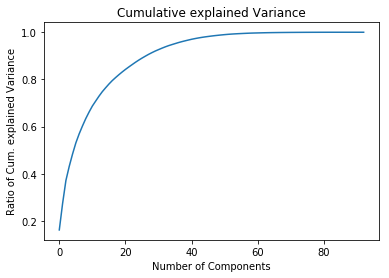

In [10]:
# Plot curve with cumulative sum
plt.plot(sum_expl_var_a1)
plt.title('Cumulative explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Cum. explained Variance')


([<matplotlib.axis.XTick at 0x7f1a518364a8>,
 <a list of 19 Text xticklabel objects>)

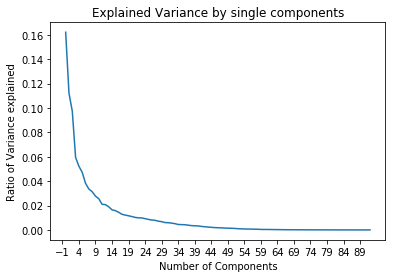

In [11]:
# Plot curve with explained variance
plt.plot(expl_var_a1)
plt.title('Explained Variance by single components')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Variance explained')
plt.xticks(range(-1, q_a1 + 1, 5))

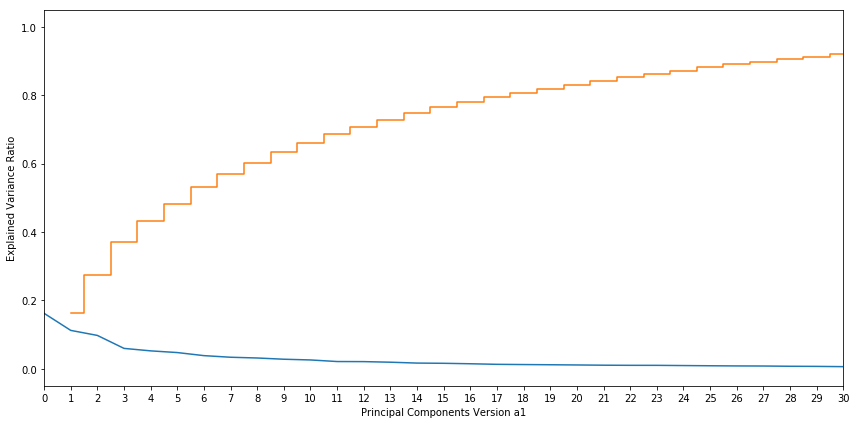

In [12]:
# Plot Feature Importances (both cumulative and idividual)
plt.figure(figsize = (12, 6))
plt.plot(expl_var_a1) #range(0, q_1 + 1), align = 'center')
plt.xticks(range(0, q_a1 + 1, 1))
plt.xlim([0, 30])
plt.xlabel('Principal Components Version a1')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, q_a1 + 1), sum_expl_var_a1, where = 'mid')

plt.tight_layout();

########  =>>> plt.bar(range(0, q_1), expl_var_1, alogn = 'center') gives ERROR MESSAGE.

### Choose number of Principal Components  and get them for further use

In [13]:
# Define number of principal components we wish to extract
q_1 = 10

# Create PCA object
pca_1 = PCA(n_components = q_1)

# Fit PCA object to find first principal components
pca_1.fit(X1_train)

pca_1

# Get the amount of variance that each PC explains
# The eigenvalues represent the variance in the direction of the eigenvector
# These numbers for each component are proportional to the Eigenvalues 
# This means that the ratio of the eigenvalue of the first principal component 
# to the eigenvalue of the second principal component is 0.16214649
# SEE => https://stackoverflow.com/questions/37757172/finding-and-utilizing-eigenvalues-and-eigenvectors-from-pca-in-scikit-learn?rpca.q=1
expl_var_1 = pca_1.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q_1
sum_expl_var_1 = np.cumsum(expl_var_1)[:q_1]

# because we run PCA for only q_1 components, sum of al explained Variance of the training set should be LESS than 1

print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_1[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_1.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_1[0:10])
print("")


Explained Variance, first 10 rows: 
[0.16214649 0.11216581 0.09743374 0.05947605 0.05223016 0.04726126
 0.03826889 0.03356824 0.03135146 0.02775339]

Explained Variance in Total = 0.6616554897565036

Cumulative explained Variance, first 10 rows: 
[0.16214649 0.2743123  0.37174604 0.43122209 0.48345225 0.53071351
 0.5689824  0.60255064 0.6339021  0.66165549]



### Extract q_1 number of features out of Training Set

In [39]:
# Extract q_1 number of features according to pca analysis
# WEBSITE => https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
X1_train_transformed = pca_1.fit_transform(X1_train)
display(X1_train_transformed)
len(X1_train_transformed)
display(X1_train_transformed.shape)
display(X1_train.shape)

# This gives the Eigenvalues?

array([[ 4.31588675e+00,  1.70672318e+00, -4.33759985e-01, ...,
        -5.47525480e-01,  1.63984993e+00, -1.47766412e+00],
       [ 5.24855901e+00,  2.40443438e+00,  1.64361757e+00, ...,
        -3.05245021e-02,  1.90952320e+00, -6.37551656e-01],
       [-2.45572812e+00,  5.91317731e+00, -2.26734862e-01, ...,
        -3.97421013e-01, -1.15410555e-01,  1.33016342e+00],
       ...,
       [ 2.87437349e+00, -2.12139288e+00, -2.21536944e+00, ...,
        -9.60183532e-01,  1.58392336e+00,  9.76376602e-03],
       [-2.12665993e+00,  2.52635620e+00, -1.47265657e+00, ...,
         3.01172797e-01,  4.49059862e-01, -7.35953405e-01],
       [ 4.34957149e+00,  5.66862512e-03,  2.45509809e+00, ...,
         6.22805677e-01, -6.27927061e-01,  1.25790238e+00]])

(2815, 10)

(2815, 93)

## Transform new data (Test set) using the already fitted pca_1
##    
## (((NOT SURE IT ITS CORRECT)))
##   

#### PCA components

### Dont know how to use this 

In [15]:
# Print PCA components: every row is a principal component in the p-dimensional space
# Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_ 
# SEE SKLEARN DOCUMENTATION

print(pca_1.components_)

[[-3.70390688e-02 -3.18185285e-02 -9.66550246e-03 -5.97540687e-02
   5.86715357e-02  5.94328409e-02  5.90505380e-02  6.35052469e-02
   5.90644685e-02  5.90584062e-02  4.38984175e-02  1.30710497e-01
   1.30797078e-01  5.90505380e-02 -9.79236734e-03 -4.18708470e-03
  -4.18272698e-03 -3.39775887e-03 -3.41085547e-03 -5.06782936e-03
  -4.91636643e-03  5.60745390e-03  5.59867211e-02 -9.27691316e-02
  -7.22840383e-02 -4.17449667e-02 -3.75518874e-02 -7.07607383e-04
   8.31548460e-03  1.63773262e-01  6.61872976e-02 -5.06771861e-02
   1.54453136e-01  6.49904010e-02  6.16923727e-02  1.01418249e-01
   1.51902572e-01  1.35997774e-01  2.06322123e-01  2.52060752e-02
   1.76681987e-01  2.78652057e-02 -5.02910978e-06  1.03718206e-01
   6.28974926e-05  4.44599753e-02  1.33369312e-01  1.52463626e-01
   2.22894068e-01 -2.19513443e-01 -1.91141268e-01 -2.20604852e-01
   3.48236739e-02  3.45788933e-02  1.81118543e-01 -1.04277808e-01
  -7.20055832e-02 -1.92442243e-01 -1.57119440e-01 -4.22206675e-02
   9.23066

## Prediction with RandomForest

In [40]:

X1_train_transformed = pca_1.fit_transform(X1_train)
X1_test_transformed = pca_1.transform(X1_test)


my_forest_1 = RandomForestClassifier(random_state = 1)
my_forest_1.max_depth = 8
my_forest_1.fit(X1_train_transformed, y1_train)

prediction_1 = my_forest_1.predict(X1_test_transformed)

display(prediction_1[1:5])


print('Sum of all Ones (Train) = ' + str(y1_train.sum() / y1_train.size))
print('Score (Prediction) =  ' + str(prediction_1.sum() / prediction_1.size))
print("")


array([1., 1., 1., 1.])

Sum of all Ones (Train) = 0.5602131438721136
Score (Prediction) =  0.7670454545454546



# Prepare Data for Version 2: Dataset with rows dropped where Nan

### Feature Matrix and Response Vector 

In [17]:
# Extract labels of features
labels_of_features_2 = dropnan_dataset.columns[:-1]
type(labels_of_features_2)

# X2 is the feature matrix
X2 = dropnan_dataset.iloc[:, :-1]

display(X2.head())

,Unnamed: 0,PERMNO,DATE,NAICS,BIDLO,ASKHI,PRC,VOL,BID,ASK,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
0,73,10107,1328054400000000000,511210.0,29.890,31.87,31.740,9870347.0,31.73,31.74,...,1.556,0.130,0.027,0.0,0.053,4.085,0.783,0.0252,-20.961,1.367
1,74,10107,1330560000000000000,511210.0,31.555,32.85,32.255,9445449.0,32.24,32.25,...,1.556,0.130,0.027,0.0,0.053,4.155,0.796,0.0248,-21.784,1.468
2,76,10107,1335830400000000000,511210.0,29.060,32.01,29.190,10123951.0,29.19,29.20,...,1.508,0.132,0.027,0.0,0.060,3.497,0.636,0.0274,9.552,1.347
3,77,10107,1338508800000000000,511210.0,28.450,30.93,30.590,9679085.0,30.58,30.59,...,1.508,0.132,0.027,0.0,0.060,3.656,0.667,0.0262,-30.032,1.089
4,79,10107,1343779200000000000,511210.0,29.190,30.90,30.820,6689457.0,30.81,30.82,...,1.407,0.133,0.022,0.0,0.127,3.785,1.441,0.0260,1.451,1.767


In [18]:
# y2 is the response vector
y2 = dropnan_dataset.iloc[:, -1]
display(y2.head())

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: NEXT_DAY_PREDICTION, dtype: float64

### Train - / Test - Split

In [19]:
# Do the train - test- split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0, stratify = y2)


In [20]:
# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y2_train.sum() / y2_train.size)
display(y2_test.sum() / y2_test.size)


0.5725524475524476

0.5734265734265734

### Standardize Variables

In [21]:
# Standardization with sklearn StandardScaler
standard_scaler_2 = preprocessing.StandardScaler().fit(X2_train)
X2_train = standard_scaler_2.transform(X2_train)
X2_test = standard_scaler_2.transform(X2_test)


###   
## Feature Extraction 
## for Version 2: Dataset with rows dropped where Nan
###   

### Run PCA on whole Training Set for all possible PCAs (= number of columns)

In [22]:
# Run PCA for all possible PCAs
pca_2 = PCA().fit(X2_train)

# Define maximal number of principal components => the "1" in shape[1] refers to columns ("0" would be rows)
q_2 = X2_train.shape[1]

# Get the amount of variance that each PC explains
expl_var_2 = pca_2.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q
sum_expl_var_2 = np.cumsum(expl_var_2)[:q_2]


print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_2[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_2.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_2[0:10])
print("")
print('Maximal number (q_2) of PCs is: ' + str(q_2))


Explained Variance, first 10 rows: 
[0.21706937 0.10834824 0.09389473 0.06581307 0.06190083 0.05694969
 0.05041091 0.04141501 0.03428958 0.02498159]

Explained Variance in Total = 1.0000000000000002

Cumulative explained Variance, first 10 rows: 
[0.21706937 0.32541762 0.41931235 0.48512542 0.54702625 0.60397595
 0.65438686 0.69580187 0.73009144 0.75507304]

Maximal number (q_2) of PCs is: 93


Text(0,0.5,'Ratio of Cum. explained Variance')

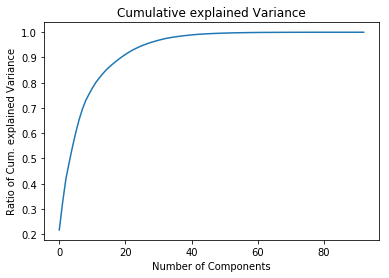

In [23]:
# Plot curve with cumulative sum
plt.plot(sum_expl_var_2)
plt.title('Cumulative explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Cum. explained Variance')


([<matplotlib.axis.XTick at 0x7f1a536d7c50>,
 <a list of 3 Text xticklabel objects>)

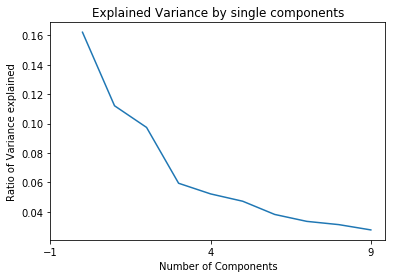

In [24]:
# Plot curve with explained variance
plt.plot(expl_var_1)
plt.title('Explained Variance by single components')
plt.xlabel('Number of Components')
plt.ylabel('Ratio of Variance explained')
plt.xticks(range(-1, q_1 + 1, 5))

In [25]:
# Extract q_1 number of features according to pca analysis
# WEBSITE => https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
X2_train_extracted = pca_2.fit_transform(X2_train)

len(X2_train_extracted)

1144

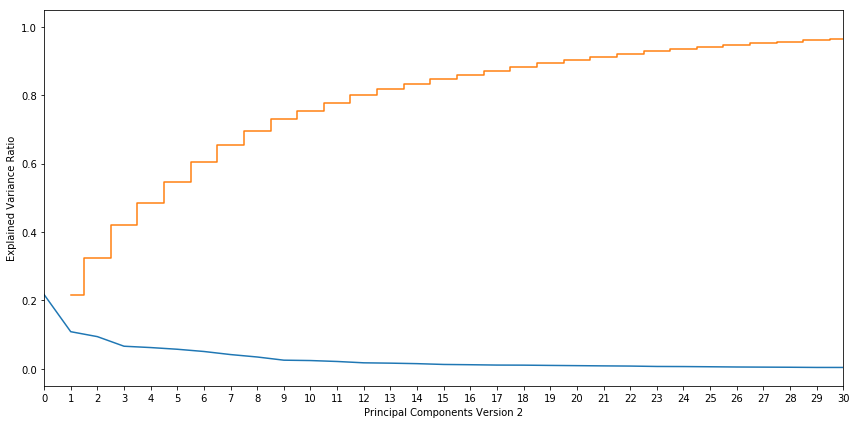

In [26]:
# Plot Feature Importances (both cumulative and idividual)
plt.figure(figsize = (12, 6))
plt.plot(expl_var_2) #range(0, q_2 + 1), align = 'center')
plt.xticks(range(0, q_2 + 1, 1))
plt.xlim([0, 30])
plt.xlabel('Principal Components Version 2')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, q_2 + 1), sum_expl_var_2, where = 'mid')

plt.tight_layout();

########  =>>> plt.bar(range(0, q_2), expl_var_2, alogn = 'center') gives ERROR MESSAGE.

### Choose number of Principal Components  and get them for further use

In [27]:
# Define number of principal components we wish to extract
q_2 = 15

# Create PCA object
pca_2 = PCA(n_components = q_2)

# Fit PCA object to find first principal components
pca_2.fit(X2_train)

pca_2

# Get the amount of variance that each PC explains
# The eigenvalues represent the variance in the direction of the eigenvector
# These numbers for each component are proportional to the Eigenvalues 
# This means that the ratio of the eigenvalue of the first principal component 
# to the eigenvalue of the second principal component is 0.16214649
# SEE => https://stackoverflow.com/questions/37757172/finding-and-utilizing-eigenvalues-and-eigenvectors-from-pca-in-scikit-learn?rpca.q=1
expl_var_2 = pca_2.explained_variance_ratio_

# Get cumulative sum of the PCA 1-q_2
sum_expl_var_2 = np.cumsum(expl_var_2)[:q_2]

# because we run PCA for only q_2 components, sum of al explained Variance of the training set should be LESS than 1

print("")
print('Explained Variance, first 10 rows: ')
print(expl_var_2[0:10])
print("")
print('Explained Variance in Total = ' + str(expl_var_2.sum()))
print("")
print('Cumulative explained Variance, first 10 rows: ')
print(sum_expl_var_2[0:10])
print("")


Explained Variance, first 10 rows: 
[0.21706937 0.10834824 0.09389473 0.06581307 0.06190083 0.05694969
 0.05041091 0.04141501 0.03428958 0.02498155]

Explained Variance in Total = 0.848461881726987

Cumulative explained Variance, first 10 rows: 
[0.21706937 0.32541762 0.41931235 0.48512542 0.54702625 0.60397595
 0.65438686 0.69580186 0.73009144 0.75507299]



### Extract q_2 number of features out of Training Set

In [28]:
# Extract q_2 number of features according to pca analysis
# WEBSITE => https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
X2_train_extracted = pca_2.fit_transform(X2_train)
display(X2_train_extracted)
len(X2_train_extracted)

# This gives the Eigenvalues?

array([[-10.254509  ,  -2.95849927,   2.21537498, ...,  -1.00640293,
         -1.36490339,  -0.145899  ],
       [ -0.93634257,  -5.79333345,  -2.31945344, ...,   0.88222393,
          0.21511245,   0.74738875],
       [  7.60996106,  -0.54309225,  -0.17030508, ...,   1.54202399,
         -0.23448722,   0.15670464],
       ...,
       [ -2.27781704,  -1.43696758,   3.79231791, ...,   0.21382942,
         -0.44943151,   1.04168889],
       [  4.06552266,   2.683452  ,  -0.36246011, ...,  -0.65682263,
          0.85415913,   0.14633698],
       [ -6.63701627,  -0.63234267,   3.544298  , ...,  -0.61270952,
         -0.86670566,   0.97814525]])

1144

## Transform new data (Test set) using the already fitted pca_2
##    
## (((NOT SURE IT ITS CORRECT)))
##   

In [29]:
# Use the fitted pca_1 on another dataset, lilke X_test to transform it
X2_test_transformed = pca_2.transform(X2_test)


#### PCA components

### Dont know how to use this 

In [30]:
# Print PCA components: every row is a principal component in the p-dimensional space
# Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_ 
# SEE SKLEARN DOCUMENTATION

print(pca_2.components_)

[[-0.06857736 -0.06763221  0.02522969 ... -0.06945914 -0.00787033
  -0.04264266]
 [ 0.07196869  0.02422862  0.11523395 ...  0.10375749  0.00113693
   0.07833752]
 [-0.09288517 -0.10013465  0.08751868 ...  0.02504752  0.02877135
  -0.00211094]
 ...
 [-0.12477416 -0.15082534 -0.03339231 ...  0.00855883 -0.14349697
   0.1906719 ]
 [-0.01244268 -0.03297462 -0.09356515 ...  0.12476191  0.1307732
   0.00071452]
 [ 0.0110054   0.06910985  0.19747007 ...  0.00631275 -0.20982801
   0.06818013]]


## Pipelines and Other

In [31]:
# https://stats.stackexchange.com/questions/144439/applying-pca-to-test-data-for-classification-purposes

